In [1]:
#importing the required python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [4]:
#Reading the csv file and creating data frame from that csv file
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

In [25]:
#Counting the null values in each column
df.isnull().sum() 

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
release_year_month       0
dtype: int64

In [7]:
#Displaying the column labels
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
#Ensuring dataset lies within 500 to 4,000 lines of data with some number of columns between 5 and 50.
#Identifying the number of rows and columns in the dataframe
#There are 953 rows and 24 columns
df.shape

(953, 24)

In [9]:
#Ensuring that all the show ids are unique and there is no duplicate
df['track_name'].nunique()

943

In [10]:
#Displaying the data types
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [11]:
#Displaying first five rows in the data frame
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [12]:
#Displaying last five rows in the data frame
df.tail(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,18,32,1,0,90,E,Minor,61,32,67,15,0,11,5


In [13]:
#Converting streams into float
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
top_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
top_streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


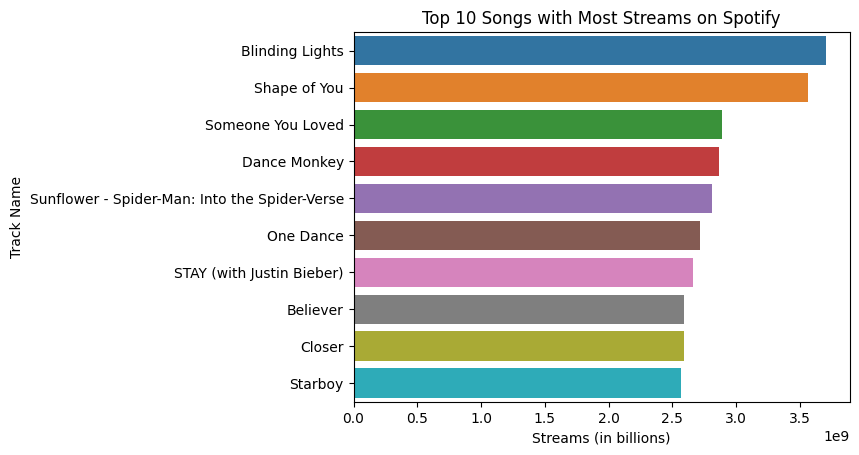

In [34]:
#Create a barplot to visualize the top 10 most streamed songs
sns.barplot(x=top_streams['streams'], y=top_streams['track_name'])
# Labeling the plot
plt.xlabel('Streams (in billions)') #Label for the x-axis
plt.ylabel('Track Name') #Label for the y-axis
plt.title('Top 10 Songs with Most Streams on Spotify') #Title for the plot

# Save the plot as a PNG file
plt.savefig('top_10_streams.png')

In [16]:
#Calculate the top 5 most frequently occurring artists in the dataset
top_artists = df['artist(s)_name'].value_counts().head(5)
top_artists

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

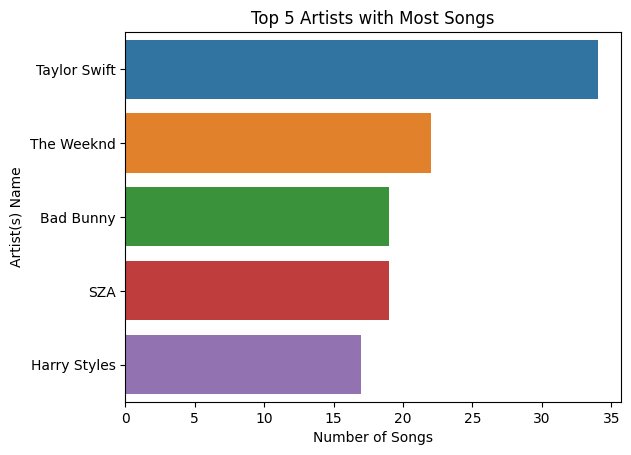

In [32]:
#Create a barplot to visualize the top 5 artists with the most songs in the dataset
sns.barplot(x=top_artists.values, y=top_artists.index, data=df)

#Labeling the plot
plt.xlabel('Number of Songs')#Label for the x-axis
plt.ylabel('Artist(s) Name') #Label for the y-axis
plt.title('Top 5 Artists with Most Songs') #Title for the plot

# Save the plot as a PNG file
plt.savefig('top_5_artists.png')

In [19]:
#Identifying the range of release years using the min() and max() functions

#Find the minimum and maximum release years
min_released_year = df['released_year'].min()
max_released_year = df['released_year'].max()

#Find the index of the row with the minimum and maximum release years
idx_min = df['released_year'].idxmin()
idx_max = df['released_year'].idxmax()

#Get the track names associated with the minimum and maximum release years
track_name_min = df.loc[idx_min, 'track_name']
track_name_max = df.loc[idx_max, 'track_name']

#Convert the release years to strings for printing
min_released_year = str(min_released_year)
max_released_year = str(max_released_year)

#Print the results
print('The oldest song release in the dataframe is in the year ' + min_released_year)
print('The most recent song release in the dataframe is in the year ' + max_released_year)
print(f'The song with the oldest release year is: {track_name_min}')
print(f'The song with the most recent release year is: {track_name_max}')

The oldest song release in the dataframe is in the year 1930
The most recent song release in the dataframe is in the year 2023
The song with the oldest release year is: Agudo Mï¿½ï¿½gi
The song with the most recent release year is: Seven (feat. Latto) (Explicit Ver.)


In [20]:
#Filtering out data of between 2020 and 2023
filtered_data = df[(df['released_year'] >= 2020) & (df['released_year'] <= 2023)]
filtered_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


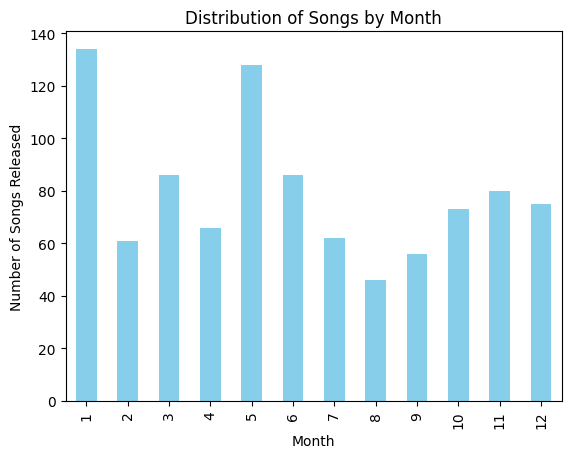

In [31]:
#Group the dataset by the month of release and count the number of songs in each month
songs_by_month = df.groupby('released_month')['track_name'].count()

#Create a bar plot to visualize the distribution of songs by month
songs_by_month.plot(kind='bar', color='skyblue')

#Labeling the plot
plt.xlabel('Month')  #Label for the x-axis
plt.ylabel('Number of Songs Released') #Label for the y-axis
plt.title('Distribution of Songs by Month') #Title for the plot

# Save the plot as a PNG file
plt.savefig('distribution_of_songs.png')

In [22]:
#Assuming you have columns 'released_year' and 'released_month' in your DataFrame

#Create a new column that combines year and month for grouping
df['release_year_month'] = df['released_year'].astype(str) + '-' + df['released_month'].astype(str)

#Group by release_year_month and sum the streams
monthly_streams = df.groupby('release_year_month')['streams'].sum()

#Find the month with the highest total streams
highest_stream_month = monthly_streams.idxmax()

#Find the month with the lowest total streams
lowest_stream_month = monthly_streams.idxmin()

#Print the results
print(f"Month with the highest total streams: {highest_stream_month}")
print(f"Month with the lowest total streams: {lowest_stream_month}")

Month with the highest total streams: 2022-5
Month with the lowest total streams: 1970-1


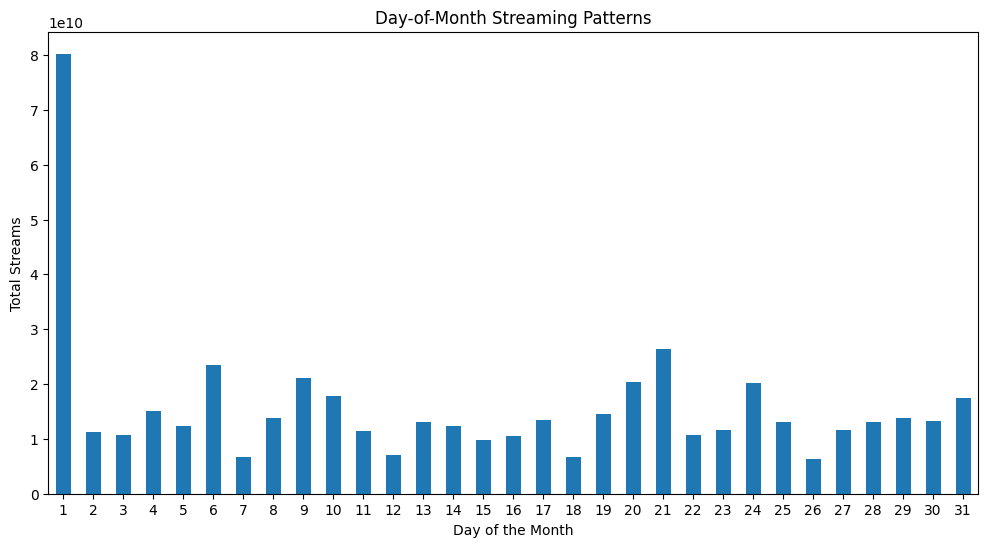

Day with the highest total streams: 1
Day with the lowest total streams: 26


In [27]:
#Group by released_day and calculate the total streams for each day
day_of_week_streams = df.groupby('released_day')['streams'].sum()

#Find the day with the highest total streams
most_popular_day = day_of_week_streams.idxmax()

#Find the day with the lowest total streams
least_popular_day = day_of_week_streams.idxmin()

#Create a list of labels for all 30 days
day_labels = [str(i) for i in range(1, 32)]

#Visualize the streaming patterns throughout the month
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
day_of_week_streams.plot(kind='bar')
plt.title("Day-of-Month Streaming Patterns")
plt.xlabel("Day of the Month")
plt.ylabel("Total Streams")
plt.xticks(range(31), day_labels, rotation=0)  # Rotate the labels for better visibility

# Save the plot as a PNG file
plt.savefig('streaming_patterns.png')
plt.show()

#Print the results
print(f"Day with the highest total streams: {most_popular_day}")
print(f"Day with the lowest total streams: {least_popular_day}")


In [24]:
#Group the dataset by the 'released_year' and count the number of songs released in each year
df.groupby(['released_year']).agg({'released_year':'count'})

,released_year
released_year,
1930,1
1942,1
1946,1
1950,1
1952,1
1957,2
1958,3
1959,2
1963,3


In [28]:
#Checking the DataFrame columns after adding new columns
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'release_year_month'],
      dtype='object')

In [30]:
#Creating output file
csv_file_path = 'output_file.csv'
#Using the to_csv() method to export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False) 